# *Group-EN-2021 55*

>###  Artur César ARAÚJO ALVES
>### Rafael Ryoma NAGAI MATSUTANE
>### João Pedro TANAKA MONTALVÃO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, t, f
df = pd.read_csv('https://raw.githubusercontent.com/JpTanaka/ozone_dataset/main/ozone_complet%20.csv', sep=";").dropna()
n = 30

In [ ]:
df.columns


Index(['maxO3', 'T6', 'T9', 'T12', 'T15', 'T18', 'Ne6', 'Ne9', 'Ne12', 'Ne15',
       'Ne18', 'Vdir6', 'Vvit6', 'Vdir9', 'Vvit9', 'Vdir12', 'Vvit12',
       'Vdir15', 'Vvit15', 'Vdir18', 'Vvit18', 'Vx', 'maxO3v'],
      dtype='object')

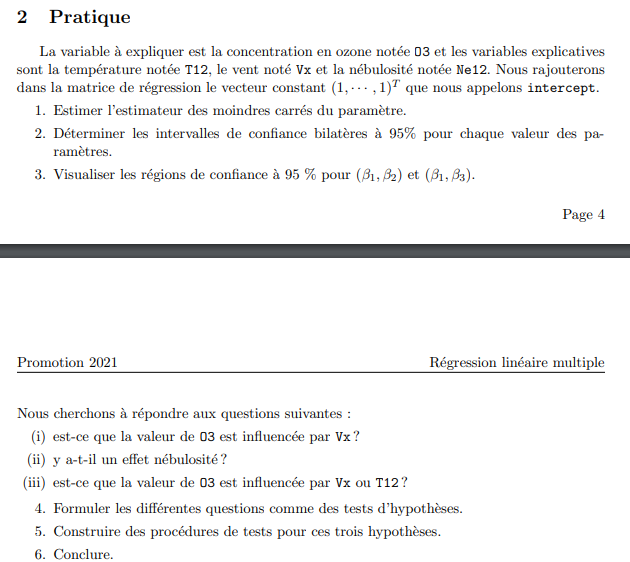

Pour calculer l'estimateur de beta, on sait que
$$\hat{β} = (Z^TZ)^{-1}Z^TY$$


In [ ]:
# Variables explicatives
Z = np.array([df.T12, df.Vx, df.Ne12]).transpose()

# Variable à expliquer
Y = np.array([df.maxO3]).transpose()

# Calcul de beta
a = np.linalg.inv(np.dot(Z.transpose(), Z))
est_beta = np.dot(a, np.dot(Z.transpose(),Y))
print(est_beta)

[[3.98802596]
 [1.75236703]
 [1.32649402]]


Les intervalles de confiance de $\beta^Tx$ sont donnés par:
$$x^T\hat{\beta}-\hat{\sigma}q_{1-\frac{\alpha}{2}}\sqrt{x^T(Z^TZ)^{-1}x}<\beta^Tx<x^T\hat{\beta}-\hat{\sigma}q_{\frac{\alpha}{2}}\sqrt{x^T(Z^TZ)^{-1}x}$$

D'où $q_\alpha$ est le quantile d'ordre $\alpha$ de la loi de Student à n-p degrés de liberté, et:

$$ \hat{\sigma}^2=\frac{1}{n-p}||Y-Z\hat{\beta}||^2$$

In [ ]:
def calc_lower_bound(est_sigma, x, est_beta, Z):
  p = len(Z[0])
  n = len(Z)
  q_r = t.ppf(1-0.05/2, n-p)
  b = np.sqrt(np.linalg.multi_dot([x.transpose(), np.linalg.inv(np.dot(Z.transpose(), Z)), x]))
  return np.dot(x.transpose(), est_beta) - q_r*np.dot(np.sqrt(est_sigma), b)

def calc_upper_bound(est_sigma, x, est_beta, Z):
  p = len(Z[0])
  n = len(Z)
  q_l = t.ppf(0.05/2, n-p)
  b = np.sqrt(np.linalg.multi_dot([x.transpose(), np.linalg.inv(np.dot(Z.transpose(), Z)), x]))
  return np.dot(x.transpose(), est_beta) - q_l*np.dot(np.sqrt(est_sigma), b)

def calc_est_sigma(Y, Z, est_beta):
  """
    return est_sigma au carré
  """
  p = len(Z[0])
  n = len(Z)
  W = Y-np.dot(Z, est_beta)
  return np.dot(W.transpose(), W)/(n-p)



In [ ]:
est_sigma = calc_est_sigma(Y, Z, est_beta)
x_1 = np.array([1, 0, 0]).transpose()
x_2 = np.array([0, 1, 0]).transpose()
x_3 = np.array([0, 0, 1]).transpose()

print(str(calc_lower_bound(est_sigma, x_1, est_beta, Z)[0][0])+" < beta_1 < "+str(calc_upper_bound(est_sigma, x_1, est_beta, Z)[0][0]))
print(str(calc_lower_bound(est_sigma, x_2, est_beta, Z)[0][0])+" < beta_2 < "+str(calc_upper_bound(est_sigma, x_2, est_beta, Z)[0][0]))
print(str(calc_lower_bound(est_sigma, x_3, est_beta, Z)[0][0])+" < beta_3 < "+str(calc_upper_bound(est_sigma, x_3, est_beta, Z)[0][0]))




3.88365068882717 < beta_1 < 4.092401237799671
1.402778325675624 < beta_2 < 2.1019557265339044
0.9464735803414304 < beta_3 < 1.706514462958057


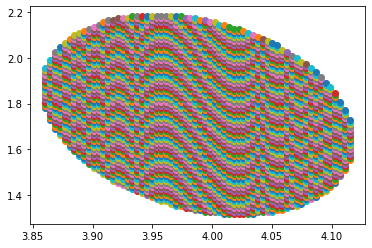

In [ ]:
def g(est_sigma, est_beta, Z, b1, b2):
  A = np.array([[1,0,0], [0,1,0]])
  B = np.array([[b1, b2, 0]]).transpose()
  AB = np.dot(A, (est_beta-B))
  C = np.linalg.inv(np.linalg.multi_dot([A, np.linalg.inv(np.dot(Z.transpose(), Z)), A.transpose()]))
  D = np.linalg.multi_dot([AB.transpose(), C, AB])
  return D/(2*est_sigma)


p = len(Z[0])
n = len(Z)
d1 = np.linspace(3.8,4.2,100)
d2 = np.linspace(1.3,2.2,100)
fractile = f.ppf(0.95, 2, n-p)
for x in d1:
  for y in d2:
    if (g(est_sigma, est_beta, Z, x , y)<=fractile):
      plt.scatter(x, y)




plt.show()

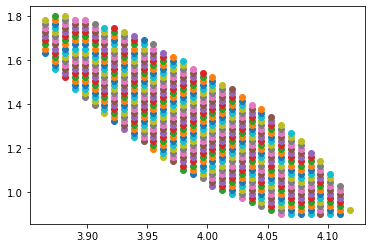

In [ ]:
def h(est_sigma, est_beta, Z, b1, b3):
  A = np.array([[1,0,0], [0,0,1]])
  B = np.array([[b1, 0, b3]]).transpose()
  AB = np.dot(A, (est_beta-B))
  C = np.linalg.inv(np.linalg.multi_dot([A, np.linalg.inv(np.dot(Z.transpose(), Z)), A.transpose()]))
  D = np.linalg.multi_dot([AB.transpose(), C, AB])
  return D/(2*est_sigma)

  p = len(Z[0])
n = len(Z)
d1 = np.linspace(3.8,4.2,50)
d2 = np.linspace(0.9,1.8,50)
fractile = f.ppf(0.95, 2, n-p)
for x in d1:
  for y in d2:
    if (h(est_sigma, est_beta, Z, x , y)<=fractile):
      plt.scatter(x, y)

plt.show()



Pour faire deux premiers testes, on va utiliser le statistique suivant:

$$ T(Z) = \dfrac{x^T\hat{\beta}}{\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}} $$

Donc, la taille $\alpha$ sera donné par:

$$sup_{\theta \in \Theta_0} ℙ_\theta = ℙ(T(Z)>q_{1-\alpha})\leq \alpha$$

où $q_{1-\alpha}$ est le quantile d'ordre $1-\alpha$ de la loi de Student à n-p degrés de liberté.

Pour le dernier test, on va utiliser la formule 
$$ T(Z) = \frac{1}{2\hat{\sigma}^2}[\hat{\beta_1}-\beta_1,\, \hat{\beta_2}-\beta_2][A(Z^TZ)^{-1}A^T]^{-1}\begin{bmatrix}
\hat{\beta_1}-\beta_1\\
\hat{\beta_2}-\beta_2\\
\end{bmatrix}$$

Et, donc, la taille sera donné par:

$$sup_{\theta \in \Theta_0} ℙ_\theta = ℙ(T(Z)> f_{(2,\, n-p,\, 1-\alpha)})\leq \alpha$$

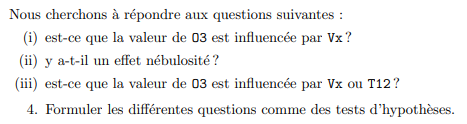

Les tests d'hypothèses utilisés seront les suivants:

$i) H_0: \beta_2 = 0$ contre $\beta_2 \neq 0$

$ii) H_0: \beta_3 = 0$ contre $\beta_3 \neq 0$

$iii) H_0: \beta_2 = 0$ et $\beta_1=0$ contre $H_1: \beta_2\neq0$ ou $\beta_1\neq 0$ 

In [ ]:
def statistique(x, est_beta, est_sigma, Z):
  numerateur =np.dot(x.transpose(), est_beta)
  denominateur = np.sqrt(est_sigma)*np.sqrt(np.linalg.multi_dot([x.transpose(), np.linalg.inv(np.dot(Z.transpose(), Z)), x]))
  return numerateur/denominateur

def statistique2(est_beta, est_sigma, Z):
  A = np.array([[1,0,0], [0,1,0]])
  AB = np.dot(A, est_beta)
  C = np.linalg.inv(np.linalg.multi_dot([A, np.linalg.inv(np.dot(Z.transpose(), Z)), A.transpose()]))
  D = np.linalg.multi_dot([AB.transpose(), C, AB])
  return D/(2*est_sigma)


x_1 = np.array([0,1,0])
alpha = 0.05

print("Pour le test 1, le statistique a donné",statistique(x_1, est_beta, est_sigma, Z)[0][0],"alors que le quantile d'ordre 1-0.05 est", t.ppf(1-alpha, n-p))
x_2 = np.array([0,0,1])
print("Pour le test 2, le statistique a donné",statistique(x_2, est_beta, est_sigma, Z)[0][0],"alors que le quantile d'ordre 1-0.05 est", t.ppf(1-alpha, n-p))
print("Pour le test 3, le statistique a donné",statistique2(est_beta, est_sigma, Z)[0][0],"alors que le quantile d'ordre 1-0.05 est", f.ppf(1-alpha, 2, n-p))

Pour le test 1, le statistique a donné 9.833352378565623 alors que le quantile d'ordre 1-0.05 est 1.6459723442260976
Pour le test 2, le statistique a donné 6.847503384931346 alors que le quantile d'ordre 1-0.05 est 1.6459723442260976
Pour le test 3, le statistique a donné 3285.6349670091663 alors que le quantile d'ordre 1-0.05 est 3.0023262399520774


Donc, à partir de ces tests, on rejete les trois hypothèses avec probabilité de se tromper de moins de 5%.

Donc, la conclusion est que tous les variables explicatives choisis sont significatives et donc, on doit les utiliser toutes pour avoir un pouvoir de prévision plus cohérent.